In [62]:
import pandas as pd
import numpy as np

In [106]:
df = pd.DataFrame(np.random.uniform(0.5, 1, size = (1000,2)), columns = list('AB'))

In [107]:
df.loc[len(df.index)] = [1, 1] 
df.loc[len(df.index)] = [0, 1] 
df.loc[len(df.index)] = [1, 0] 
df.loc[len(df.index)] = [0, 0] 

In [108]:
df.tail()

,A,B
999,0.814671,0.582664
1000,1.000000,1.000000
1001,0.000000,1.000000
1002,1.000000,0.000000
1003,0.000000,0.000000


In [110]:
eig_vals

array([0.02384373, 0.02202705])

In [109]:
eig_vals, eig_vecs = np.linalg.eig(np.cov(df.T))

In [111]:
eig_vals[0] / sum(eig_vals)

0.5198021707077428

In [112]:
projected_X = df.dot(eig_vecs.T[0])
projected_X

0       1.105836
1       1.079555
2       0.978739
3       0.945204
4       1.089313
          ...   
999     0.999915
1000    1.406176
1001    0.627805
1002    0.778370
1003    0.000000
Length: 1004, dtype: float64

In [113]:
df['y_axis'] = 0.0
df['PCA'] = projected_X
df.tail()

,A,B,y_axis,PCA
999,0.814671,0.582664,0.0,0.999915
1000,1.000000,1.000000,0.0,1.406176
1001,0.000000,1.000000,0.0,0.627805
1002,1.000000,0.000000,0.0,0.778370
1003,0.000000,0.000000,0.0,0.000000


/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



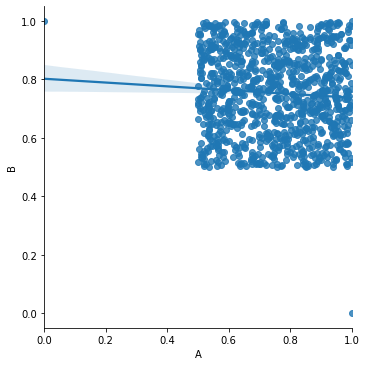

In [94]:
import seaborn as sns

sns.lmplot('A', 'B', data=df)

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



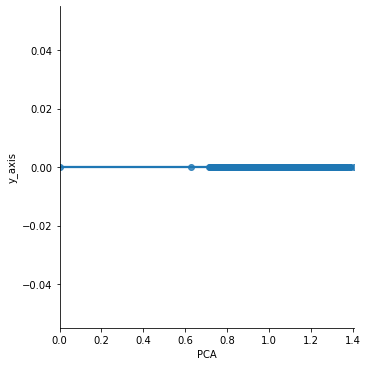

In [114]:
sns.lmplot('PCA', 'y_axis', data=df)

In [115]:
import plotly.express as px

In [116]:
px.scatter(df, 'A', 'B', 'PCA')

In [82]:
max = df['PCA'].loc[df['PCA'].idxmax()]      # Maximum in column
print(max)

-0.012446540153764164


In [83]:
min = df['PCA'].loc[df['PCA'].idxmin()]      # Minimum in column
print(min)

-1.3956063426482908
